# Exercise 2 - Newton's and Steffensen's Fractals
David Knapik 260607757

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
from PIL import Image

The following piece of code defines the iteration map 

$$\phi(z)=z-\frac{z^3-1}{3z^2}$$

of the Newton-Raphson method for the equation $z^3-1=0$. In addition, the three roots are specified, and a color for each of the roots is chosen.

In [4]:
#Newton-Raphson iteration for z**3-1=0
def phi(z):
    z=complex(z)
    return z+(1/(z*z)-z)/3  #phi(z)
#cubic roots of 1
zz=[1,complex(-.5,.5*np.sqrt(3)),complex(-.5,-.5*np.sqrt(3))]
#corresponding colors
cc=[[1,0,0],[0,1,.5],[0,0,1]]

We consider the rectangle $(x_{\textrm{min}},x_{\textrm{max}})\times(y_{\textrm{min}},y_{\textrm{max}})$ in the $z$-plane, and superimpose on it a grid of size $\texttt{imgx}\times\texttt{imgy}$. From each grid point, we start the Newton-Raphson iteration, and depending on the root it converges to, we color the point. Convergence is deemed to occur if the cuurent iterand is within $\varepsilon$ distance of a root. In case the iteration takes too long (i.e., $\texttt{iteration number} > \texttt{maxit}$), or division by zero occurs, we leave the point uncolored (black). We also shade the colors in such a way that darker regions correspond to points that need more iterations to converge to a root.

ValueError: Floating point image RGB values must be in the 0..1 range.

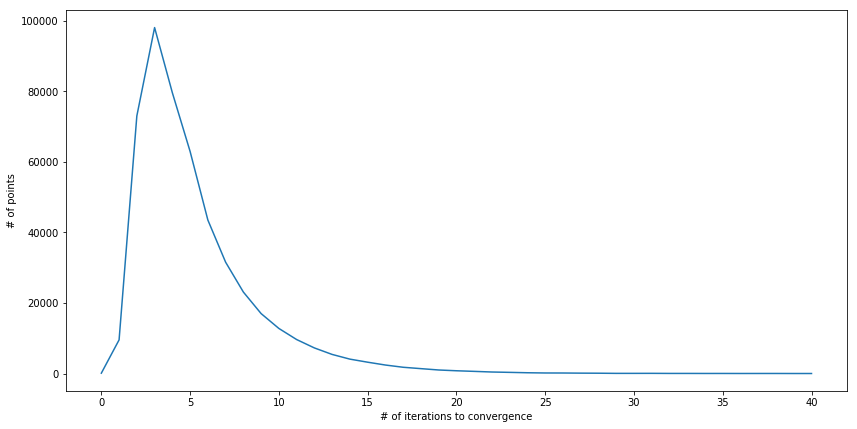

In [5]:
xmin = -1.
xmax = 1.2
ymin = -1.1
ymax = 1.1
eps = .0001
maxit = 40
imgx = 700
imgy = 700
img = np.zeros((imgy,imgx,3))
a = (xmax-xmin)/imgx
b = (ymax-ymin)/imgy
h = np.zeros(maxit+1)
sit=20
f = 1./sit
for i in range(imgy):
    for j in range(imgx):
        x=xmin+a*j
        y=ymax-b*i
        z0=complex(x,y)
        for k in range(maxit):
            if abs(z0)<eps:
                h[maxit]+=1
                break
            z=phi(z0)
            con=False
            for l in range(len(zz)):
                if abs(z-zz[l])<eps:
                    con=True
                    break
            if(con):
                img[i,j]=[(sit-k)*f*c for c in cc[l]]
                h[k]+=1
                break
            z0=z
        if k==maxit: h[maxit]+=1
plt.figure(figsize=(15,15))
plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
plt.show()
scipy.misc.imsave('newt.png', img)
plt.figure(figsize=(14,7))
plt.plot(range(maxit+1),h)
plt.xlabel('# of iterations to convergence')
plt.ylabel('# of points')
plt.show()

Why is there a large monochromatic region around each of the roots: This is because any point near a root will converge rapidly to that root and do nothing interesting. In other words, we have well-behaved convergence of the Newton-Raphson method.

We generate a nice fractal by zooming in on a boundary:

ValueError: Floating point image RGB values must be in the 0..1 range.

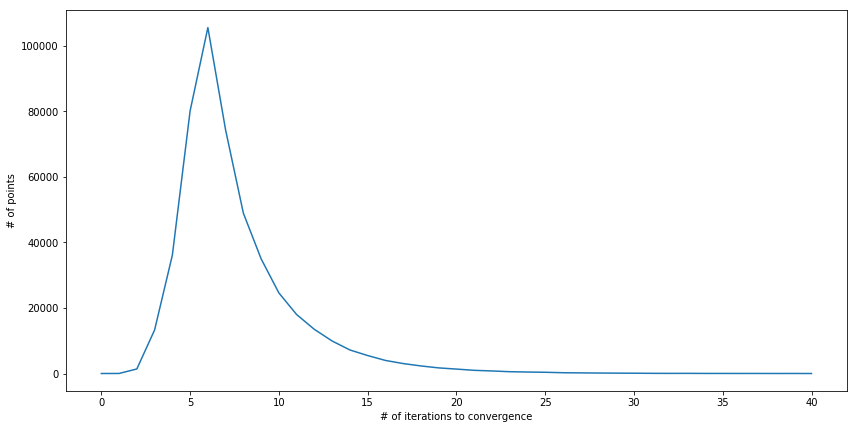

In [6]:
xmin = -0.75 #Zoom
xmax = -0.25 #Zoom
ymin = 0
ymax =0.3
eps = .0001
maxit = 40
imgx = 700
imgy = 700
img = np.zeros((imgy,imgx,3))
a = (xmax-xmin)/imgx
b = (ymax-ymin)/imgy
h = np.zeros(maxit+1)
sit=20
f = 1./sit
for i in range(imgy):
    for j in range(imgx):
        x=xmin+a*j
        y=ymax-b*i
        z0=complex(x,y)
        for k in range(maxit):
            if abs(z0)<eps:
                h[maxit]+=1
                break
            z=phi(z0)
            con=False
            for l in range(len(zz)):
                if abs(z-zz[l])<eps:
                    con=True
                    break
            if(con):
                img[i,j]=[(sit-k)*f*c for c in cc[l]]
                h[k]+=1
                break
            z0=z
        if k==maxit: h[maxit]+=1
plt.figure(figsize=(15,15))
plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
plt.show()
scipy.misc.imsave('newtzoom.png', img)
plt.figure(figsize=(14,7))
plt.plot(range(maxit+1),h)
plt.xlabel('# of iterations to convergence')
plt.ylabel('# of points')
plt.show()

Heuristic explanation of the fractal nature of the boundary: We have teardrop shaped blobs that make up the boundary line, but each of the blobs itself is composed of boundary lines of further blobs so we definitely have a fractal. This is due to bad starting approximations, since then our tangent line in the N-R method extends very far and intersects the axis far from the root. So, a small area along say a local max of the curve ends up with the N-R iterations sweeping a large area. This expansion of small areas to bigger areas is essential for creating our fractal behaviour.

Now, we modify the code for $z^4-2z^3+2z^2-2z+1$. Here, 
$$\phi(z)=\frac{3z^3-z^2+z+1}{2(2z^2-z+1)}$$

In [16]:
#Newton-Raphson iteration for z^4-2z^3+2z^2-2z+1
def myphi(z):
    z=complex(z)
    return (3*z*z*z-z*z+z+1)/(2*(2*z*z-z+1))  #phi(z)
#roots
myzz=[complex(0,1),complex(0,-1),1]
#corresponding colors
cc=[[1,0,0],[0,1,.5],[0,0,1]]

ValueError: Floating point image RGB values must be in the 0..1 range.

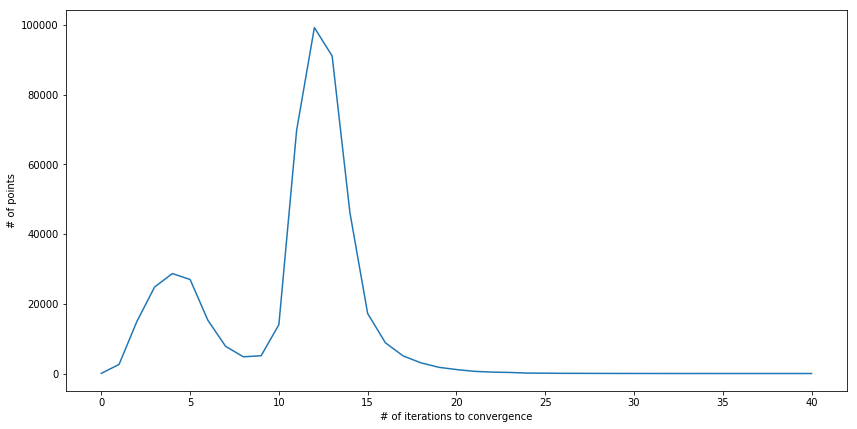

In [17]:
xmin = -1.
xmax = 1.2
ymin = -1.1
ymax = 1.1
eps = .0001
maxit = 40
imgx = 700
imgy = 700
img = np.zeros((imgy,imgx,3))
a = (xmax-xmin)/imgx
b = (ymax-ymin)/imgy
h = np.zeros(maxit+1)
sit=20
f = 1./sit
for i in range(imgy):
    for j in range(imgx):
        x=xmin+a*j
        y=ymax-b*i
        z0=complex(x,y)
        for k in range(maxit):
            if abs(z0)<eps:
                h[maxit]+=1
                break
            z=myphi(z0)
            con=False
            for l in range(len(myzz)):
                if abs(z-myzz[l])<eps:
                    con=True
                    break
            if(con):
                img[i,j]=[(sit-k)*f*c for c in cc[l]]
                h[k]+=1
                break
            z0=z
        if k==maxit: h[maxit]+=1
plt.figure(figsize=(15,15))
plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
plt.show()
scipy.misc.imsave('newt2.png', img)
plt.figure(figsize=(14,7))
plt.plot(range(maxit+1),h)
plt.xlabel('# of iterations to convergence')
plt.ylabel('# of points')
plt.show()

Investigate and explain the resulting graphics: As expected, there are large monochromatic regions around each of the roots. We also have fractals on the boundary, and they are much smaller than those for $z^3-1$.

Now, we implement Steffenson's iteration for the equation $z^3-1=0$.

In [19]:
#Steffenson's iteration for z**3-1=0
def sphi(z):
    z=complex(z)
    return z-((z**3-1)*(z**3-1))/((z+z**3-1)*(z+z**3-1)*(z+z**3-1)-z**3)  #phi(z)
#cubic roots of 1
zz=[1,complex(-.5,.5*np.sqrt(3)),complex(-.5,-.5*np.sqrt(3))]
#corresponding colors
cc=[[1,0,0],[0,1,.5],[0,0,1]]

ValueError: Floating point image RGB values must be in the 0..1 range.

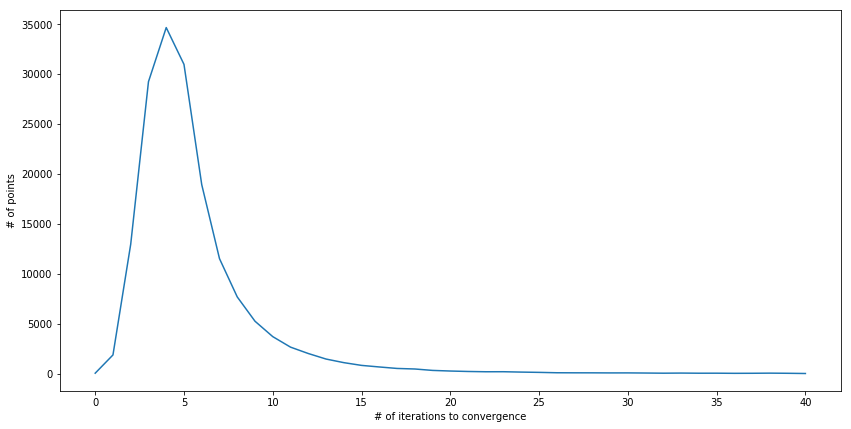

In [20]:
xmin = -1.
xmax = 1.2
ymin = -1.1
ymax = 1.1
eps = .0001
maxit = 40
imgx = 700
imgy = 700
img = np.zeros((imgy,imgx,3))
a = (xmax-xmin)/imgx
b = (ymax-ymin)/imgy
h = np.zeros(maxit+1)
sit=20
f = 1./sit
for i in range(imgy):
    for j in range(imgx):
        x=xmin+a*j
        y=ymax-b*i
        z0=complex(x,y)
        for k in range(maxit):
            if abs(z0)<eps:
                h[maxit]+=1
                break
            z=sphi(z0)
            con=False
            for l in range(len(zz)):
                if abs(z-zz[l])<eps:
                    con=True
                    break
            if(con):
                img[i,j]=[(sit-k)*f*c for c in cc[l]]
                h[k]+=1
                break
            z0=z
        if k==maxit: h[maxit]+=1
plt.figure(figsize=(15,15))
plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
plt.show()
scipy.misc.imsave('steph1.png', img)
plt.figure(figsize=(14,7))
plt.plot(range(maxit+1),h)
plt.xlabel('# of iterations to convergence')
plt.ylabel('# of points')
plt.show()

In [32]:
#Steffenson's iteration for z**3-1=0  , omega 5
def sphi(z):
    z=complex(z)
    w=z**3-1
    return z-(5*(w**2))/((z+5*w)**3-z**3) #phi(z)
#cubic roots of 1
zz=[1,complex(-.5,.5*np.sqrt(3)),complex(-.5,-.5*np.sqrt(3))]
#corresponding colors
cc=[[1,0,0],[0,1,.5],[0,0,1]]

ValueError: Floating point image RGB values must be in the 0..1 range.

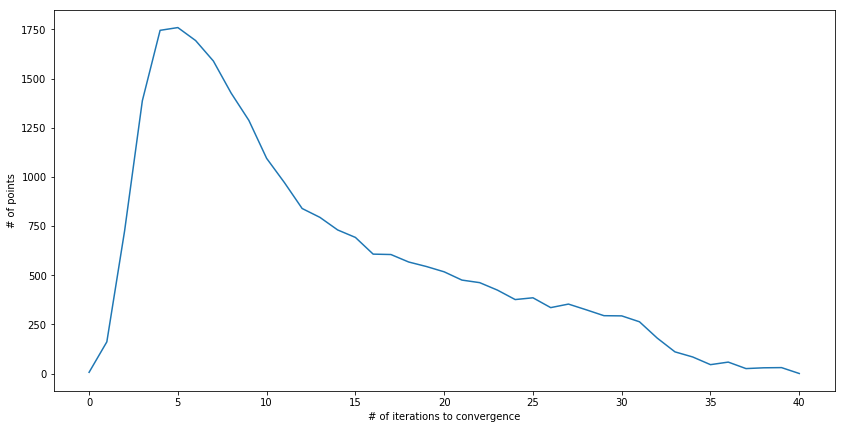

In [33]:
xmin = -1.
xmax = 1.2
ymin = -1.1
ymax = 1.1
eps = .0001
maxit = 40
imgx = 700
imgy = 700
img = np.zeros((imgy,imgx,3))
a = (xmax-xmin)/imgx
b = (ymax-ymin)/imgy
h = np.zeros(maxit+1)
sit=20
f = 1./sit
for i in range(imgy):
    for j in range(imgx):
        x=xmin+a*j
        y=ymax-b*i
        z0=complex(x,y)
        for k in range(maxit):
            if abs(z0)<eps:
                h[maxit]+=1
                break
            z=sphi(z0)
            con=False
            for l in range(len(zz)):
                if abs(z-zz[l])<eps:
                    con=True
                    break
            if(con):
                img[i,j]=[(sit-k)*f*c for c in cc[l]]
                h[k]+=1
                break
            z0=z
        if k==maxit: h[maxit]+=1
plt.figure(figsize=(15,15))
plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
plt.show()
scipy.misc.imsave('steph5.png', img)
plt.figure(figsize=(14,7))
plt.plot(range(maxit+1),h)
plt.xlabel('# of iterations to convergence')
plt.ylabel('# of points')
plt.show()

Explanation of behaviour: We see that for all our $\omega$, the Steffensen's  iteration performed much worse than N-R, as seen by the rather large amount of black/grey coloring. If we just consider the Steffensen's iteration and look at the dependence on $\omega$, we see that $\omega=0.1$ performed the best, $\omega=5$ performed the worst, and $\omega=1$ performed somewhere in the middle.

Now, we show that Steffensen's method is locally a quadratically convergent method. 

Let $x \in \mathbb{R}$.